In [209]:
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis, skew
import math

import pandas as pd
import matplotlib.pyplot as plt


# load the dataset
banknote_data = read_excel('data_banknote_authentication.xlsx')

dataset = banknote_data.values
banknote_data.head()

Variance  Skewness  Kurtosis  Entropy  Authenticity
0     3.622     8.666    -2.807   -0.447             0
1     4.546     8.167    -2.459   -1.462             0
2     3.866    -2.638     1.924    0.106             0
3     3.457     9.523    -4.011   -3.594             0
4     0.329    -4.455     4.572   -0.989             0

# Understand the Data

In [210]:
# The correlation between variables:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = banknote_data.corr(method='pearson')
print(correlations)


              Variance  Skewness  Kurtosis  Entropy  Authenticity
Variance         1.000     0.264    -0.381    0.277        -0.725
Skewness         0.264     1.000    -0.787   -0.526        -0.445
Kurtosis        -0.381    -0.787     1.000    0.319         0.156
Entropy          0.277    -0.526     0.319    1.000        -0.023
Authenticity    -0.725    -0.445     0.156   -0.023         1.000


In [211]:
#Check if data are skewed:
skew = banknote_data.skew()
print(skew)

Variance       -0.149
Skewness       -0.394
Kurtosis        1.089
Entropy        -1.022
Authenticity    0.223
dtype: float64


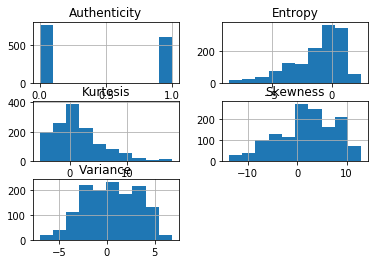

In [212]:
# Univariate Histograms
banknote_data.hist()
plt.show()

In [213]:
# split into input (X) and output (y) variables
X = dataset[:,0:4]
y = dataset[:,4]
print(X)
print(y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0. 0. 0. ... 1. 1. 1.]


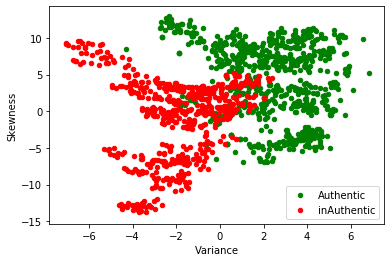

In [214]:
authentic_data = banknote_data[banknote_data['Authenticity'] == 0]
inauthentic_data = banknote_data[banknote_data['Authenticity'] == 1]
ax = authentic_data.plot(kind = 'scatter',x = 'Variance',y = 'Skewness', color = 'green', label = 'Authentic')
inauthentic_data.plot(kind = 'scatter',x = 'Variance',y = 'Skewness', c = 'red', ax = ax, label = 'inAuthentic')
ax.legend()
plt.show()

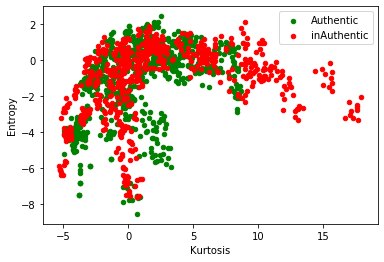

In [215]:
ax = authentic_data.plot(kind = 'scatter',x = 'Kurtosis',y = 'Entropy', color = 'green', label = 'Authentic')
inauthentic_data.plot(kind = 'scatter',x = 'Kurtosis',y = 'Entropy', c = 'red', ax = ax, label = 'inAuthentic')
ax.legend()
plt.show()

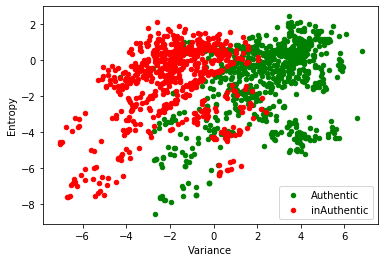

In [216]:
ax = authentic_data.plot(kind = 'scatter',x = 'Variance',y = 'Entropy', color = 'green', label = 'Authentic')
inauthentic_data.plot(kind = 'scatter',x = 'Variance',y = 'Entropy', c = 'red', ax = ax, label = 'inAuthentic')
ax.legend()
plt.show()

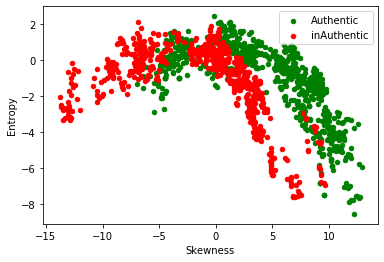

In [217]:
ax = authentic_data.plot(kind = 'scatter',x = 'Skewness',y = 'Entropy', color = 'green', label = 'Authentic')
inauthentic_data.plot(kind = 'scatter',x = 'Skewness',y = 'Entropy', c = 'red', ax = ax, label = 'inAuthentic')
ax.legend()
plt.show()

# K-Neighbors classification method

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from joblib import dump, load

#Training the model
class Model:  
    
  def train(self):
    data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=42)

    self.classifier = KNeighborsClassifier()
    self.classifier.fit(data_train, target_train)

    target_pred = self.classifier.predict(data_test)
    accuracy = metrics.accuracy_score(target_test, target_pred)

    return accuracy

  def predict(self, external_input_sample):
    prediction_raw_values = self.classifier.predict(external_input_sample)
    return prediction_raw_values


  def saveModel(self):
    dump(self.classifier, 'trained_iris_model.pkl')

  def loadModel(self):
    self.classifier = load('trained_iris_model.pkl')

In [219]:
#Requesting inputs and predicting values

inputed_list = []

inputed = float(input('Please input the Variance of the bank note: '))
inputed_list.append(inputed)
inputed = float(input('Please input the Skewness of the bank note: '))
inputed_list.append(inputed)
inputed = float(input('Please input the Kurtosis of the bank note: '))
inputed_list.append(inputed)
inputed = float(input('Please input the Entropy of the bank note: '))
inputed_list.append(inputed)
  
print(inputed_list)

external_input_sample = np.array(inputed_list)

Models = Model()

accuracy = Models.train()
print('\033[1m'+ 'Model Accuracy:', str(accuracy) + '\033[0m')

prediction = Models.predict([external_input_sample])
print('\033[1m'+ 'Prediction for {0} => \n{1}'.format(external_input_sample,  str(prediction) + '\033[0m'))

a = str(prediction)

if a == '[0]':
    print('\033[1m'+ 'AUTHENTIC Banknote' + '\033[0m' )
elif a == '[1]':
    print ( '\033[1m'+ 'INAUTHENTIC Banknote' + '\033[0m')

Models.saveModel()

Please input the Variance of the bank note: -1
Please input the Skewness of the bank note: -2
Please input the Kurtosis of the bank note: 3
Please input the Entropy of the bank note: 2
[-1.0, -2.0, 3.0, 2.0]
Model Accuracy: 1.0
Prediction for [-1. -2.  3.  2.] => 
[1.]


# Perceptron

In [220]:
x = banknote_data.iloc[:,0:4]

authentic_size = authentic_data.shape[0]
inauthentic_size = inauthentic_data.shape[0]
training_ratio = 0.8
training_authentic = int(training_ratio * authentic_size)
training_inauthentic = int(training_ratio * inauthentic_size)

print ( training_authentic, training_inauthentic)

609 488


In [221]:
training_dataframe = pd.concat([authentic_data.iloc[0:training_authentic],inauthentic_data.iloc[0:training_inauthentic]])
training_size = training_dataframe.shape[0]
training_dataframe.shape

testing_dataframe = pd.concat([authentic_data.iloc[training_authentic: ],inauthentic_data.iloc[training_inauthentic: ]])
testing_size = testing_dataframe.shape[0]
testing_dataframe.shape


training_data = training_dataframe.to_numpy()
training_data[0]

testing_data = testing_dataframe.to_numpy()
testing_data[0]


training_data_shuffle = training_data
np.random.shuffle(training_data_shuffle)
training_data_shuffle


np.set_printoptions(suppress = True)
training_data_shuffle[0:100]


training_data_shuffle2= training_data_shuffle

#Use 1 to represent authentic and -1 inauthentic
training_data_shuffle2[:,4][training_data_shuffle2[:,4] == 1] =  -1 
training_data_shuffle2[:,4][training_data_shuffle2[:,4] == 0] =  1 

training_data_shuffle2[0:100]


training_data_shuffle2[:,4] == 0




array([False, False, False, ..., False, False, False])

In [222]:
Max_Iter = 100
col = 4
row = Max_Iter

#w = pd.DataFrame(0, index = range(row), columns = range(col))
#b = pd.DataFrame(0, index = range(row), columns = [0])
#w.head()
#b.head()

w = np.zeros((row,col))
b = np.zeros((row))

ww = w[0]
bb = b[0]
for i in range(Max_Iter):
# for i in range(10):  
#     print(ww)
#     print(bb)
    for j in range(training_size):
#     for j in range(0,3):    
        x = training_data_shuffle2[j,0:4]
        y = training_data_shuffle2[j,4]
#         print(x)
#         print(y)
#         print(w[i])
#         print(x.dot(w[i]))
#         print("b= ",b[i])
        a = x.dot(ww) + bb
#         print("a=",a)
        if( y * a <= 0):
            ww = ww + y * x;
            bb = bb + y;
#         print(ww)
#         print(bb)
    w[i] = ww
    b[i] = bb
    print("w[",i,"]= ",w[i])  
    print("b[",i,"]= ",b[i])
    
    
testing_data2 = testing_data
testing_data2[:,4][testing_data[:,4] ==1] = -1
testing_data2[:,4][testing_data[:,4] ==0] = 1


w[ 0 ]=  [27.7649465 20.22529   19.831535   7.8422708]
b[ 0 ]=  -20.0
w[ 1 ]=  [38.7560865 21.52287   21.477725   7.5667778]
b[ 1 ]=  -29.0
w[ 2 ]=  [36.9976865 32.70106   31.189825   5.1076848]
b[ 2 ]=  -37.0
w[ 3 ]=  [48.0730065 30.22419   30.357905   6.3517818]
b[ 3 ]=  -43.0
w[ 4 ]=  [51.8311165 32.88729   29.649005   0.4225988]
b[ 4 ]=  -47.0
w[ 5 ]=  [50.8178165 36.75889   32.152905   6.6256158]
b[ 5 ]=  -53.0
w[ 6 ]=  [54.2880865 33.04642   40.024205  -0.5760772]
b[ 6 ]=  -54.0
w[ 7 ]=  [53.9049665 38.80305   37.209905   3.5614198]
b[ 7 ]=  -58.0
w[ 8 ]=  [58.5011365 42.22755   37.133105   1.2397898]
b[ 8 ]=  -59.0
w[ 9 ]=  [62.2566965 33.64608   39.069505   7.6721068]
b[ 9 ]=  -64.0
w[ 10 ]=  [61.6921865 43.55588   41.157105   1.9147508]
b[ 10 ]=  -65.0
w[ 11 ]=  [66.1162465 34.57898   45.178505   4.9995978]
b[ 11 ]=  -66.0
w[ 12 ]=  [67.7242265 38.55588   44.690805   7.9754348]
b[ 12 ]=  -68.0
w[ 13 ]=  [70.6357165 38.78338   44.647805   7.8943788]
b[ 13 ]=  -70.0
w[ 14 ]=  [7

In [223]:
false_amount = 0
for i in range(testing_size):

    target = testing_data[i,4]
    x = testing_data[i,0:4]
    y = x.dot(ww) + bb
    if( y * target <= 0 ):
        print("Data ",i,": False!");
        false_amount += 1
    else:
        print("Data ",i,": Correct!");

Data  0 : Correct!
Data  1 : Correct!
Data  2 : Correct!
Data  3 : Correct!
Data  4 : Correct!
Data  5 : Correct!
Data  6 : Correct!
Data  7 : Correct!
Data  8 : Correct!
Data  9 : Correct!
Data  10 : Correct!
Data  11 : Correct!
Data  12 : Correct!
Data  13 : Correct!
Data  14 : Correct!
Data  15 : Correct!
Data  16 : Correct!
Data  17 : Correct!
Data  18 : Correct!
Data  19 : Correct!
Data  20 : Correct!
Data  21 : Correct!
Data  22 : Correct!
Data  23 : Correct!
Data  24 : Correct!
Data  25 : Correct!
Data  26 : Correct!
Data  27 : Correct!
Data  28 : Correct!
Data  29 : Correct!
Data  30 : Correct!
Data  31 : Correct!
Data  32 : Correct!
Data  33 : Correct!
Data  34 : Correct!
Data  35 : Correct!
Data  36 : Correct!
Data  37 : Correct!
Data  38 : Correct!
Data  39 : Correct!
Data  40 : Correct!
Data  41 : Correct!
Data  42 : Correct!
Data  43 : Correct!
Data  44 : Correct!
Data  45 : Correct!
Data  46 : Correct!
Data  47 : Correct!
Data  48 : Correct!
Data  49 : Correct!
Data  50 :

In [224]:
accuracy = 1 - float(false_amount)/float(testing_size)
accuracy

0.9890909090909091

# Binary logistic regression (init method)

In [225]:
# split into input (X) and output (y) variables
X = dataset[:,0:4]
y = dataset[:,4]
print(X)
print(y)

# split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
train, test = X[0:train_size,:], X[train_size:len(X),:]
trainX, testX, trainy, testy = train_test_split(X, y, train_size=0.8, random_state=42)



[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0. 0. 0. ... 1. 1. 1.]


In [226]:
#Create a class
class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iters=1000):#how many integrate we use for gradient descent
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, trainX, trainy):
        n_samples, n_features = trainX.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(trainX, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(trainX.T, (y_predicted - trainy))
            db = (1 / n_samples) * np.sum(y_predicted - trainy)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, testX):
        linear_model = np.dot(testX, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [227]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

#import LogisticRegression
#from regression import LogisticRegression

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy



regressor = LogisticRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(trainX, trainy)

# make predictions
testPredict = regressor.predict(testX)
trainPredict = regressor.predict(trainX)


print("LR classification accuracy for test set:", accuracy(testy, testPredict))
print("LR classification accuracy for train set:", accuracy(trainy, trainPredict))

LR classification accuracy for test set: 0.9636363636363636
LR classification accuracy for train set: 0.9744758432087511


In [228]:
np.savetxt('resulttest.csv',np.c_[testX,testPredict,testy],fmt=['%0.5f','%0.5f','%0.5f','%0.5f','%0.5f','%0.5f'],delimiter=',',header="Variance,Skewness,Kurtosis,Entropy,Predicted,Actual",comments='')
np.savetxt('resulttrain.csv',np.c_[trainX,trainPredict,trainy],fmt=['%0.5f','%0.5f','%0.5f','%0.5f','%0.5f','%0.5f'],delimiter=',',header="Variance,Skewness,Kurtosis,Entropy,Predicted,Actual",comments='')